In [3]:
import time

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt

In [4]:
#start = time.time()

## Exploration And Visualization
Data visualization is the presentation of data in a factorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.

In [5]:
# reading train csv data
train_set = pd.read_csv("train.csv")

print(train_set.info())
print(train_set.head())

#looking for statistic info about the data
print(train_set.describe())

X, y = train_set.values[:,:-1], train_set.values[:, -1]
x = pd.DataFrame(train_set.values[:,:-1], columns = train_set.columns[:-1])

print(X.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24420 entries, 0 to 24419
Data columns (total 22 columns):
age               24411 non-null float64
education         24412 non-null object
feature_01        23047 non-null object
feature_02        24416 non-null float64
feature_03        24398 non-null float64
feature_05        24420 non-null object
feature_06        24402 non-null float64
feature_07        24415 non-null object
feature_08        24411 non-null float64
feature_09        24398 non-null float64
feature_10        24413 non-null float64
feature_11        24416 non-null float64
feature_12        24413 non-null object
feature_13        24413 non-null float64
feature_14        24406 non-null float64
feature_15        24409 non-null float64
feature_16        24405 non-null float64
feature_17        24403 non-null float64
hours.per.week    24419 non-null float64
marital.status    24411 non-null object
sex               24403 non-null object
over50K_target    24401 non-null floa

As we can notice from the describe function the min value of the feature 'age' is negative, the max value is much larger than an age of a normal person. Due to that, we will remove all negtive and unreasonable values from the 'age' feature.

In [6]:
#remove all negtive values from 'age' feature
train_set = train_set[(train_set['age'] >= 0)]

In [7]:
#remove all unreal values from 'age' feature
train_set = train_set[(train_set['age'] <= 100)]

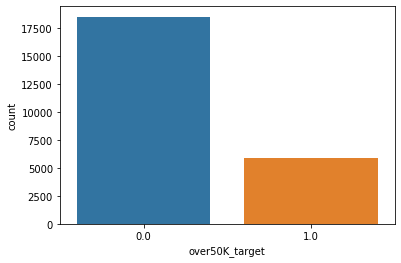

In [8]:
#Distribution of the target feature (=label).
sns.countplot(x="over50K_target", data=train_set)

As we can see from the label distribution that more people from our train data set were labe as not over 50k target.

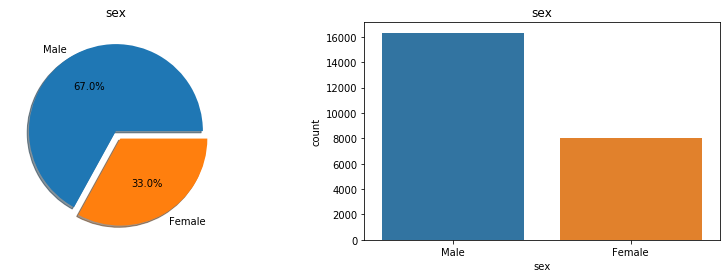

In [9]:
f,ax=plt.subplots(1,2,figsize=(14,4))
train_set['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('sex')
ax[0].set_ylabel('')
sns.countplot('sex',data=train_set,ax=ax[1])
ax[1].set_title('sex')
plt.show()

The majority of the people in our data are males (67%).

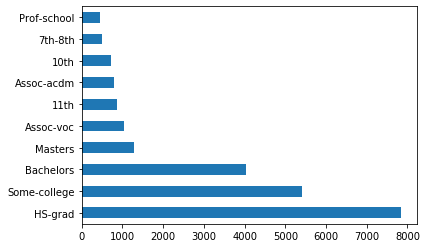

In [10]:
#We will look at the 'education' feature, we can see that 'hs-grad' is the majority in the data
train_set['education'].value_counts().head(10).plot.barh()
plt.show()

(array([4161., 4426., 4559., 4637., 2978., 1925., 1154.,  381.,  128.,
          48.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

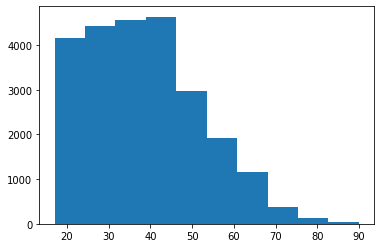

In [11]:
#Creating an histogram- we can notice that this feature distribution is a chi squere.
plt.hist(train_set['age'])

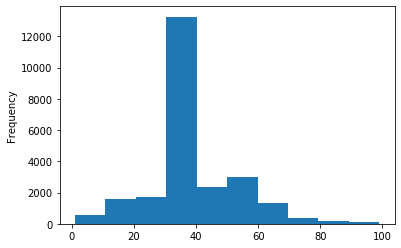

In [12]:
train_set['hours.per.week'].plot.hist()
plt.show()

## Preprocessing 
Now we will preprocessing the data in order to run models and predict a lable to a new prediction.

After some of the changes we will be able to plot more about our data.

### Missing Data
Let's see if we have missing values in the data

In [13]:
train_set.isnull().sum() 

age                  0
education            8
feature_01        1372
feature_02           4
feature_03          22
feature_05           0
feature_06          18
feature_07           5
feature_08           9
feature_09          22
feature_10           7
feature_11           4
feature_12           7
feature_13           7
feature_14          14
feature_15          10
feature_16          14
feature_17          17
hours.per.week       1
marital.status       9
sex                 17
over50K_target      19
dtype: int64

We will fill in the missing values in the train set.
For the numeric type values we will use fill in by the median value of the column (feature), for the string type values we will use the most commone value in the fill in prosses and also in the numeric category value type.

In [14]:
#drop all NAN values- there are only 17 (explanation in the report)
train_set['sex'].dropna(inplace=True)

#fill in missimg data in the train set by the median value
train_set['age'].fillna(train_set['age'].median(), inplace = True)
train_set['hours.per.week'].fillna(train_set['hours.per.week'].median(), inplace = True)
train_set['feature_02'].fillna(train_set['feature_02'].median(), inplace = True)
train_set['feature_13'].fillna(train_set['feature_13'].median(), inplace = True)

#fill in the missing values by the majority
train_set['education'].fillna(train_set['education'].value_counts().idxmax(), inplace = True)
train_set['marital.status'].fillna(train_set['marital.status'].value_counts().idxmax(), inplace = True)

#All these features for now will fill in, need to check if I should delete them or not
train_set['feature_01'].fillna(train_set['feature_01'].value_counts().idxmax(), inplace = True)
train_set['feature_03'].fillna(train_set['feature_03'].value_counts().max(), inplace = True)
train_set['feature_07'].fillna(train_set['feature_07'].value_counts().idxmax(), inplace = True)
train_set['feature_12'].fillna(train_set['feature_12'].value_counts().idxmax(), inplace = True)
train_set['feature_08'].fillna(train_set['feature_08'].median(), inplace = True)
train_set['feature_09'].fillna(train_set['feature_09'].median(), inplace = True) #notice it has weird values before filling the missing
train_set['feature_10'].fillna(train_set['feature_10'].median(), inplace = True) 
train_set['feature_11'].fillna(train_set['feature_11'].median(), inplace = True) 
train_set['feature_16'].fillna(train_set['feature_16'].median(), inplace = True) 


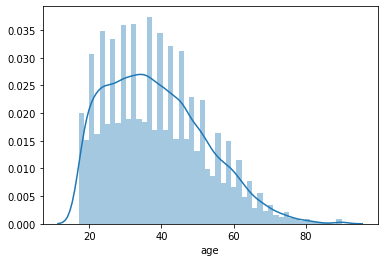

In [15]:
#After deleting all the NAN values we can plot the age distribiution, we can see that the age feature does not distribut normally.
sns.distplot(train_set['age'])

In [16]:
print(train_set['feature_01'].unique())
print(train_set['marital.status'].unique())

['A' 'D' 'C' 'F' 'B' 'E' 'G']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Widowed' 'Separated' 'Married-AF-spouse']


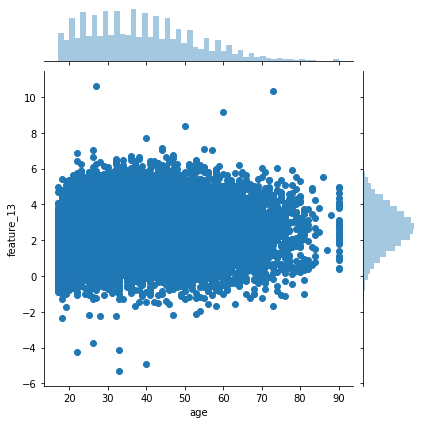

In [17]:
#We can notice that feature 13 distribut gaussian.
sns.jointplot(train_set['age'], train_set['feature_13'], kind='scatter');

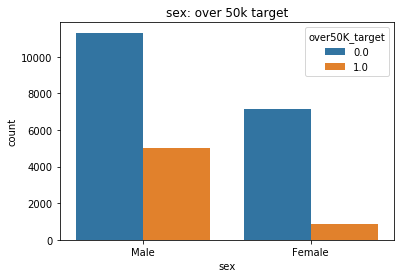

In [18]:
sns.countplot('sex', hue='over50K_target', data=train_set)
plt.title('sex: over 50k target')
plt.show()

We can learn from the plot above that the majority of both male and female are target as under 50K salary. Moreover, we can see that the chance to gain an over 50K salary is higer for males then womans.

C:\Users\rotem\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


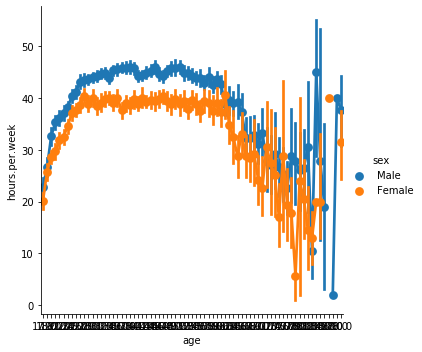

In [19]:
sns.factorplot('age','hours.per.week',hue='sex',data=train_set)
plt.show()

The main thing that we can learn from the plot above is that male at all ages works more than female

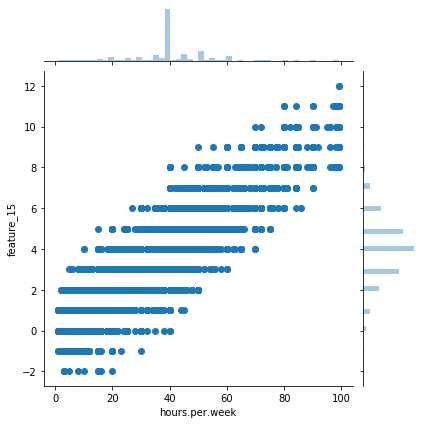

In [20]:
sns.jointplot(train_set['hours.per.week'], train_set['feature_15'], kind='scatter')

From the plot above we can see signs that these features might be lineary related

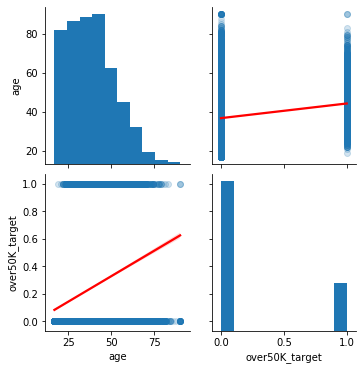

In [21]:
sns.pairplot(train_set[['age', 'sex', 'marital.status', 'over50K_target', 'education']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

We will drop al the NAN and the duplicates values from the data.

In [22]:
train_set.dropna(inplace = True)

In [23]:
#let's delete duplicates values from our data.
train_set.drop_duplicates(inplace=True)

In [24]:
train_set.isnull().sum() 

age               0
education         0
feature_01        0
feature_02        0
feature_03        0
feature_05        0
feature_06        0
feature_07        0
feature_08        0
feature_09        0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
feature_14        0
feature_15        0
feature_16        0
feature_17        0
hours.per.week    0
marital.status    0
sex               0
over50K_target    0
dtype: int64

In [25]:
print(train_set.shape)

(24302, 22)


### Deleting features


High Correlation Filter- high correlation between two variables means they have similar trends and are likely to carry similar information. If the correlation coefficient crosses a certain threshold value, we can drop one of this variables. 
Due to high correlation of 'feature_11' & 'feature_09' and 'feature_14' & 'feature_02' we will delete the next features.

In [26]:
train_set.drop(['feature_11', 'feature_14'], axis=1, inplace=True)

Deleting this feature because the value in all rows are infinity and it is not contribbute to the examination of the data.

In [27]:
del train_set['feature_06']

Deleting this feature becouse the values don't indicate like they are going to contributte to the classification.

In [28]:
train_set.head()

,age,education,feature_01,feature_02,feature_03,feature_05,feature_07,feature_08,feature_09,feature_10,feature_12,feature_13,feature_15,feature_16,feature_17,hours.per.week,marital.status,sex,over50K_target
0,38.0,10th,A,180.863215,0.0,c0,a,0.086920,0.0,77.861403,cat_c,0.002311,9.0,2559.0,175360.0,90.0,Never-married,Male,1.0
1,25.0,Bachelors,A,257.731064,1.0,c0,e,0.258428,0.0,545.113732,cat_c,3.609091,3.0,0.0,131463.0,40.0,Married-civ-spouse,Male,0.0
2,63.0,Some-college,D,231.942819,0.0,c0,a,0.151275,0.0,52.436178,cat_a,1.771711,4.0,0.0,181561.0,50.0,Divorced,Male,0.0
3,50.0,Bachelors,C,257.371117,0.0,c0,a,-0.166967,0.0,189.363109,cat_a,5.281053,3.0,0.0,251585.0,55.0,Divorced,Male,1.0
4,23.0,Some-college,A,230.946919,0.0,c0,a,0.226068,0.0,44.799075,unknown,3.905454,3.0,0.0,145964.0,40.0,Never-married,Male,0.0


In [29]:
print(train_set.shape)

(24302, 19)


Now, lets have a look and see if there is a connection between two features

In [30]:
train_set.corr()

,age,feature_02,feature_03,feature_08,feature_09,feature_10,feature_13,feature_15,feature_16,feature_17,hours.per.week,over50K_target
age,1.000000,-0.001903,-0.001770,0.119840,0.080938,0.004515,0.023364,0.055718,0.058512,-0.076209,0.066853,0.235324
feature_02,-0.001903,1.000000,0.001748,0.125365,0.097335,0.059231,0.538574,0.097517,0.061222,-0.050962,0.125553,0.285915
feature_03,-0.001770,0.001748,1.000000,0.000427,-0.000829,0.000181,-0.001637,-0.005853,-0.006458,-0.003758,-0.012790,-0.006832
feature_08,0.119840,0.125365,0.000427,1.000000,0.879875,0.010132,0.092212,0.078038,-0.054226,-0.009138,0.094287,0.311065
feature_09,0.080938,0.097335,-0.000829,0.879875,1.000000,0.005415,0.071133,0.062518,-0.032042,-0.005456,0.076433,0.225605
feature_10,0.004515,0.059231,0.000181,0.010132,0.005415,1.000000,0.033286,0.002913,0.003522,-0.000413,0.004644,0.027170
feature_13,0.023364,0.538574,-0.001637,0.092212,0.071133,0.033286,1.000000,0.072020,0.046018,-0.016666,0.093687,0.205813
feature_15,0.055718,0.097517,-0.005853,0.078038,0.062518,0.002913,0.072020,1.000000,0.042402,-0.016547,0.765415,0.178880
feature_16,0.058512,0.061222,-0.006458,-0.054226,-0.032042,0.003522,0.046018,0.042402,1.000000,-0.010415,0.057010,0.152344
feature_17,-0.076209,-0.050962,-0.003758,-0.009138,-0.005456,-0.000413,-0.016666,-0.016547,-0.010415,1.000000,-0.015353,-0.006346


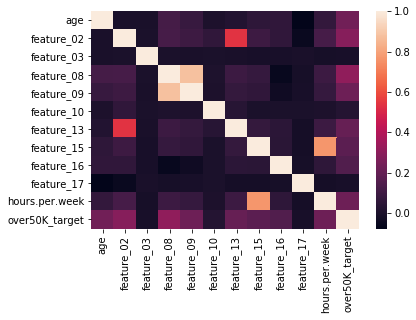

In [31]:
#Plotting the correlation of the features in the data
sns.heatmap(train_set.corr(),
            xticklabels=train_set.corr().columns,
            yticklabels=train_set.corr().columns)
plt.show()

In [32]:
# seperate object fetures and intiger fetures for future convert
object_col_names = train_set.loc[:, train_set.dtypes == object].columns
not_object_col_names = train_set.loc[:, train_set.dtypes != object].columns
print(object_col_names)
print(not_object_col_names)

Index(['education', 'feature_01', 'feature_05', 'feature_07', 'feature_12',
       'marital.status', 'sex'],
      dtype='object')
Index(['age', 'feature_02', 'feature_03', 'feature_08', 'feature_09',
       'feature_10', 'feature_13', 'feature_15', 'feature_16', 'feature_17',
       'hours.per.week', 'over50K_target'],
      dtype='object')


In [33]:
#let's delete all na values, we do not want to "fix" our prediction column
train_set.dropna(inplace = True)
print(train_set.isnull().sum())

age               0
education         0
feature_01        0
feature_02        0
feature_03        0
feature_05        0
feature_07        0
feature_08        0
feature_09        0
feature_10        0
feature_12        0
feature_13        0
feature_15        0
feature_16        0
feature_17        0
hours.per.week    0
marital.status    0
sex               0
over50K_target    0
dtype: int64


We can notice that now we don't have any missing values, and after deleting the duplicated and the null over50K target values from the data we have 24302 rows and 19 features.

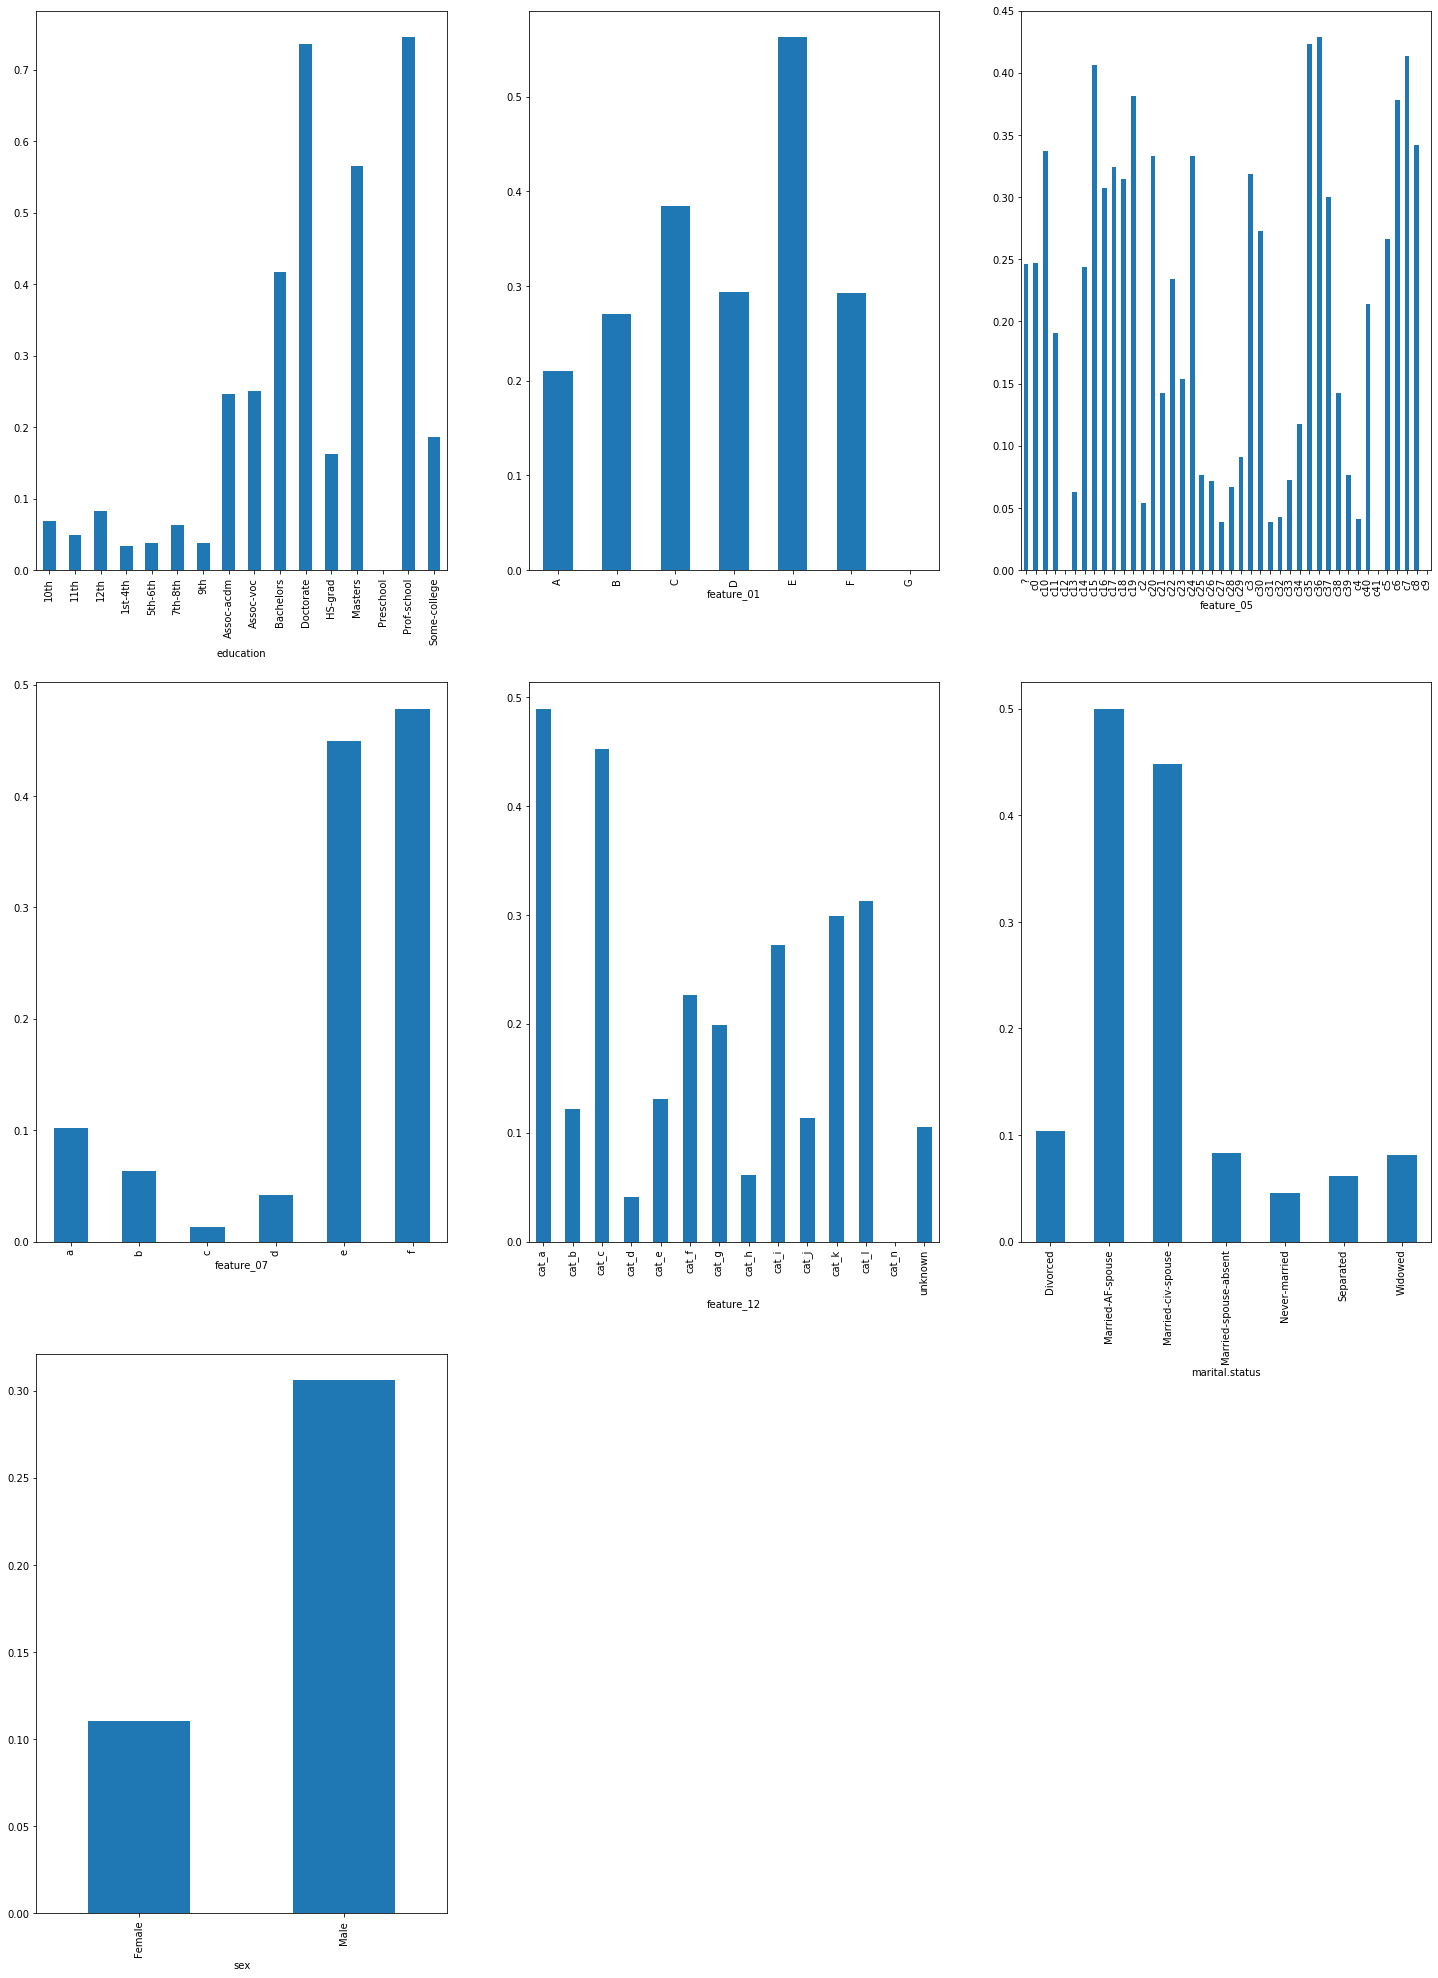

In [34]:
plt.figure(figsize=(25, 35))
for i in range(len(object_col_names)):
    plt.subplot(3, 3, i+1)
    train_set.groupby(object_col_names[i]).over50K_target.mean().plot(kind='bar')

### Outliers

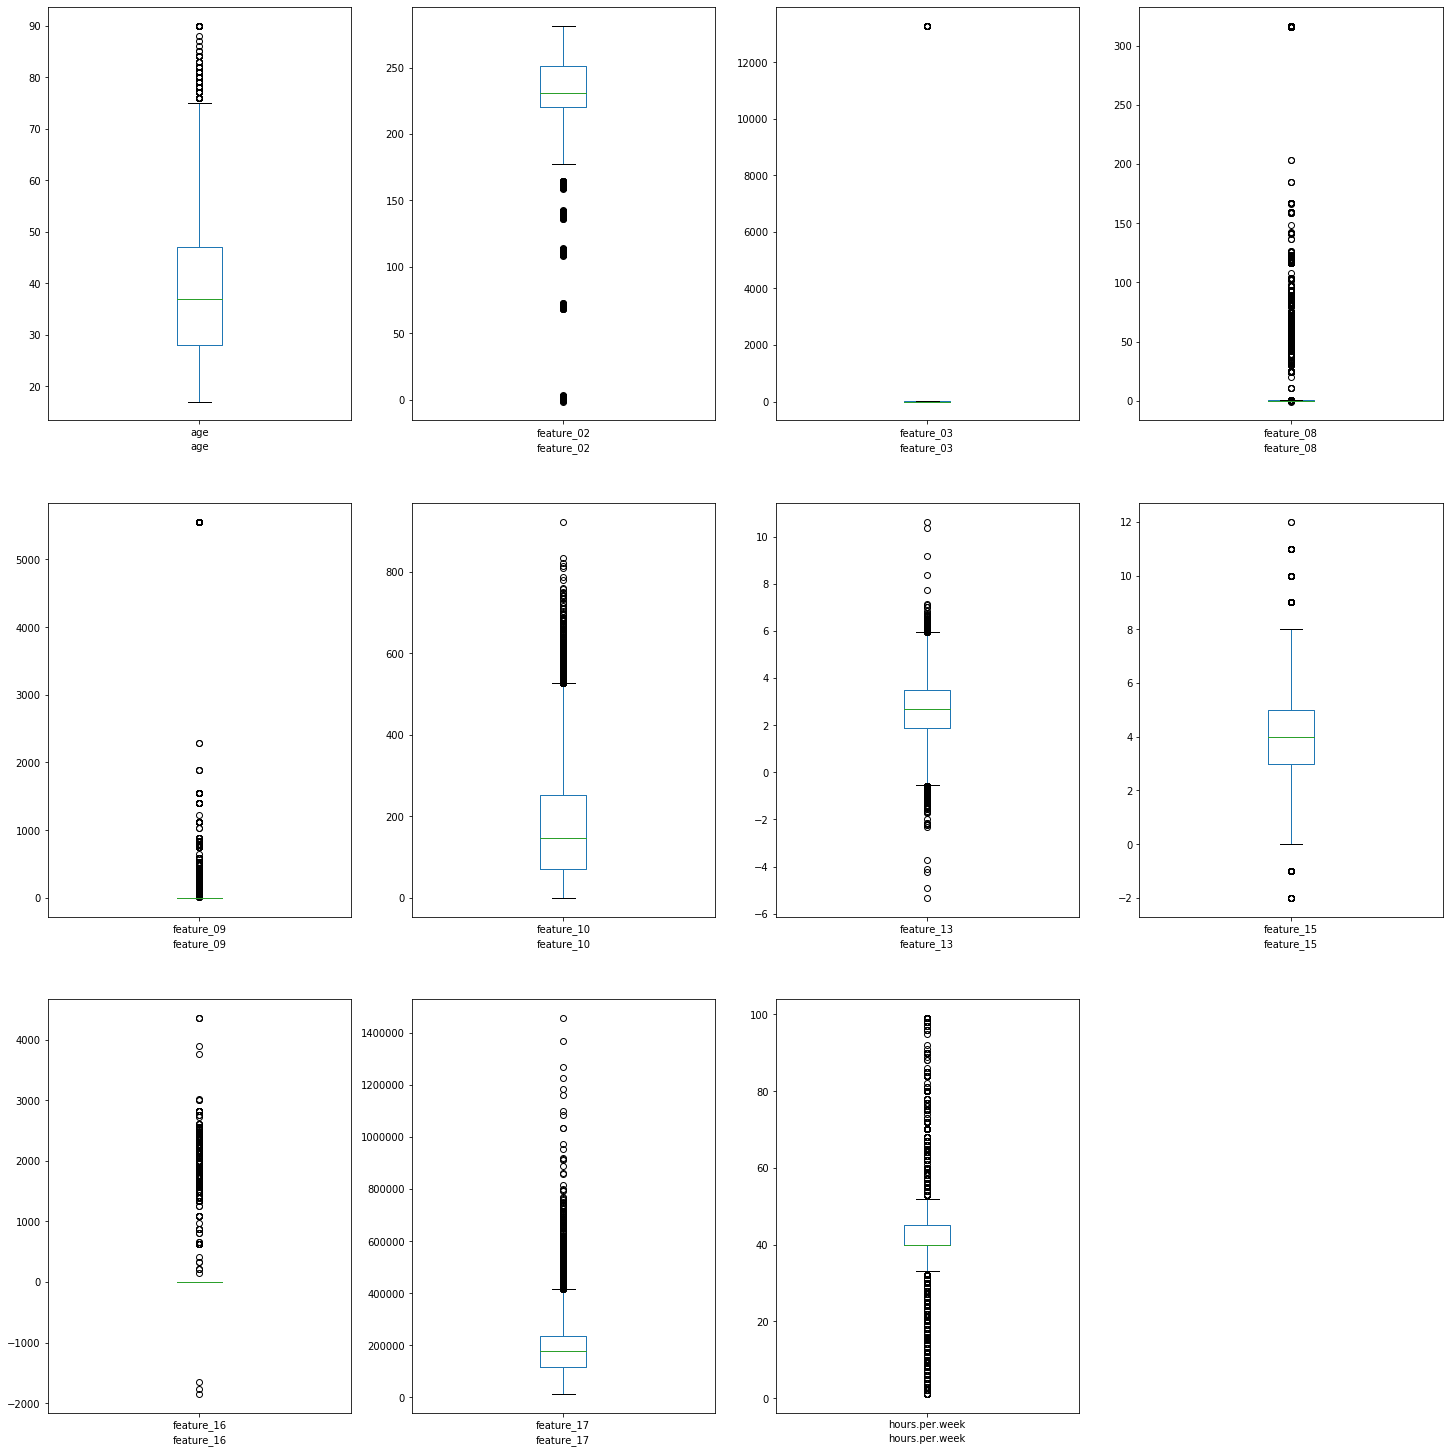

In [35]:
plt.figure(figsize=(25, 35))
for i in range(len(not_object_col_names)-1):
    plt.subplot(4, 4, i+1)
    train_set.loc[:,not_object_col_names[i]].plot(kind='box')
    plt.xlabel(not_object_col_names[i])

Outliers of object columns have no meaning so we need to remove the outliers from the numric columns and after that we can change the object col to numeric.

### Outliers Removal

Data outliers can appear due to several resones, for example: data entry errors by human, measurement errors by different instrument, sampling errors if mixing data from varios sourses, natural outliers that are not errors they novelties in data.

There are outliers in our data, as we can notice from the separated bar-plots above. We can clearly see that in fue of the features we have planty of outliers (example in feature 17). We will remove all these outliers using a for loop.
 
If we would like to remove these outliers we will use interquartile range (IQR), for each colonm we will compute the Z score and the the absolote of him and see if it larger than 3 standard deviation.


In [36]:
from scipy import stats
for i in range(len(not_object_col_names)-1):
    train_set.loc[:,not_object_col_names[i]] = train_set.loc[:,not_object_col_names[i]][(np.abs(stats.zscore(train_set.loc[:,not_object_col_names[i]])) < 3)]

In [37]:
print(train_set.isnull().sum()) 

age                 91
education            0
feature_01           0
feature_02         416
feature_03          22
feature_05           0
feature_07           0
feature_08         555
feature_09         165
feature_10         196
feature_12           0
feature_13          88
feature_15         291
feature_16        1121
feature_17         262
hours.per.week     339
marital.status       0
sex                  0
over50K_target       0
dtype: int64


After the delete of the outliers we got new rows with nan values so we will dorp them

In [38]:
train_set.dropna(inplace = True)
print(train_set.isnull().sum())

age               0
education         0
feature_01        0
feature_02        0
feature_03        0
feature_05        0
feature_07        0
feature_08        0
feature_09        0
feature_10        0
feature_12        0
feature_13        0
feature_15        0
feature_16        0
feature_17        0
hours.per.week    0
marital.status    0
sex               0
over50K_target    0
dtype: int64


Now let's plot again the boxplot and see the diffrence

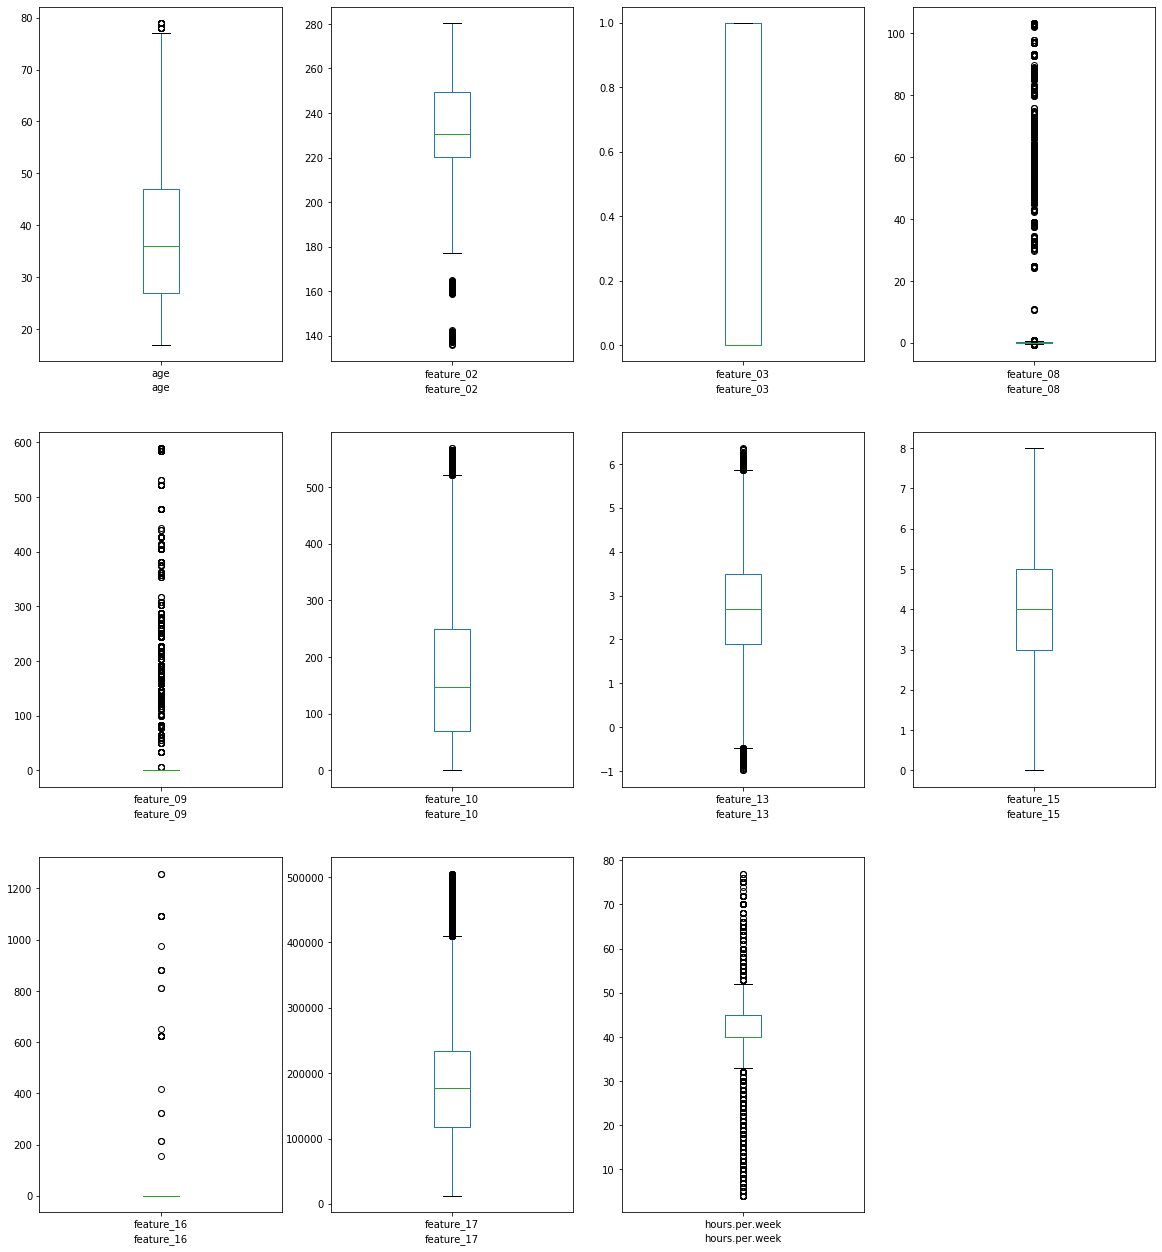

In [39]:
plt.figure(figsize=(20, 30))
for i in range(len(not_object_col_names)-1):
    plt.subplot(4, 4, i+1)
    train_set.loc[:,not_object_col_names[i]].plot(kind='box')
    plt.xlabel(not_object_col_names[i])

Let's separate the data (X) from the target atteibutes (y) 

In [40]:
X, y = train_set.values[:,:-1], train_set.values[:, -1]
x = pd.DataFrame(train_set.values[:,:-1], columns = train_set.columns[:-1])
y_train = pd.DataFrame(train_set.values[:,-1], columns = [train_set.columns[-1]])
x.shape

(21257, 18)

Now we wiil change the object column and then scale all the columns

In [41]:
x = pd.get_dummies(data=x, columns=object_col_names, drop_first=True)
print(x.shape)
x.head()

(21257, 94)


,age,feature_02,feature_03,feature_08,feature_09,feature_10,feature_13,feature_15,feature_16,feature_17,...,feature_12_cat_l,feature_12_cat_n,feature_12_unknown,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,sex_Male
0,25,257.731,1,0.258428,0,545.114,3.60909,3,0,131463,...,0,0,0,0,1,0,0,0,0,1
1,63,231.943,0,0.151275,0,52.4362,1.77171,4,0,181561,...,0,0,0,0,0,0,0,0,0,1
2,50,257.371,0,-0.166967,0,189.363,5.28105,3,0,251585,...,0,0,0,0,0,0,0,0,0,1
3,23,230.947,0,0.226068,0,44.7991,3.90545,3,0,145964,...,0,0,1,0,0,0,1,0,0,1
4,45,232.728,1,-0.13161,0,30.2271,2.37829,3,0,155659,...,0,0,0,0,1,0,0,0,0,1


### Data Normalization
Not all of the features are normalized, we need to normalized all of our data. It is super important that all of the data would be at same scale of numbers in order that the models would treat the features equally.

There are some algrotithms that features scailing is important and does matter to a better performance of theme. The KNN for example will not contribute to our model equally without scaling. In the PCA since we want to find directions of maximizing the variance we want to have features in the same scales. Moreover, logistic regression and others that based on gradient decent algorithms will optimize much slower without it.

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)
scaled_x = pd.DataFrame(scaled_x, columns=x.columns)
scaled_x.head()


,age,feature_02,feature_03,feature_08,feature_09,feature_10,feature_13,feature_15,feature_16,feature_17,...,feature_12_cat_l,feature_12_cat_n,feature_12_unknown,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,sex_Male
0,-0.972864,1.116778,1.136165,-0.247317,-0.23766,2.985569,0.783124,-0.673543,-0.036565,-0.566616,...,-0.141801,-0.063362,-0.239043,-0.026573,1.120653,-0.112998,-0.717787,-0.182477,-0.172897,0.71854
1,1.901841,0.102582,-0.880154,-0.253363,-0.23766,-0.953619,-0.790026,0.000920,-0.036565,-0.034789,...,-0.141801,-0.063362,-0.239043,-0.026573,-0.892337,-0.112998,-0.717787,-0.182477,-0.172897,0.71854
2,0.918389,1.102622,-0.880154,-0.271317,-0.23766,0.141176,2.214645,-0.673543,-0.036565,0.708566,...,-0.141801,-0.063362,-0.239043,-0.026573,-0.892337,-0.112998,-0.717787,-0.182477,-0.172897,0.71854
3,-1.124165,0.063416,-0.880154,-0.249143,-0.23766,-1.014681,1.036868,-0.673543,-0.036565,-0.412678,...,-0.141801,-0.063362,4.183352,-0.026573,-0.892337,-0.112998,1.393171,-0.182477,-0.172897,0.71854
4,0.540139,0.133444,1.136165,-0.269322,-0.23766,-1.131191,-0.270675,-0.673543,-0.036565,-0.309758,...,-0.141801,-0.063362,-0.239043,-0.026573,1.120653,-0.112998,-0.717787,-0.182477,-0.172897,0.71854


In [43]:
#let's find if there is a strong connections for new features
corr_table = scaled_x.corr().abs()
sort_corr_table = corr_table.unstack().sort_values(kind="quicksort")
#strong connection
sort_corr_table.loc[sort_corr_table>=0.9].loc[sort_corr_table<1] 

feature_07_e                       feature_03                           0.908251
feature_03                         feature_07_e                         0.908251
feature_09                         feature_08                           0.978470
feature_08                         feature_09                           0.978470
marital.status_Married-civ-spouse  feature_03                           0.983674
feature_03                         marital.status_Married-civ-spouse    0.983674
dtype: float64

Creating new feature 'feature_08_feature_09' he is a multypication of the 'feature_08' and 'feature_09'. These two have high corolation.

In [44]:
scaled_x['feature_08_feature_09'] = scaled_x['feature_08']*scaled_x['feature_09']

### Dimention Of The Data
Yes, this dimention of the data is to big, as more dimentions the data has we need more features and a more features we have we need to generalise much more data. We would like to prevent the dimention curse, as more features I have it would be difficult to combine them, moreover the dimention save us in computational cost at running the program.

Principal Component Analysis (PCA)- 
The idea of principal component analysis (PCA) is to reduce the dimensionality of a dataset consisting of a large number of related variables, while retaining as much variance in the data as possible. PCA finds a set of new variables that the original variables are just their linear combinations. The new variables are called Principal Components (PCA).
### Reducing Demention - PCA

In [45]:
#PCA - on the train set
from sklearn.decomposition import PCA

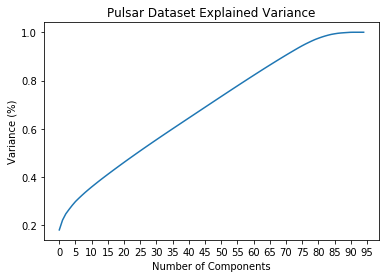

In [46]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_x)
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 100, 5)) 
plt.title('Pulsar Dataset Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

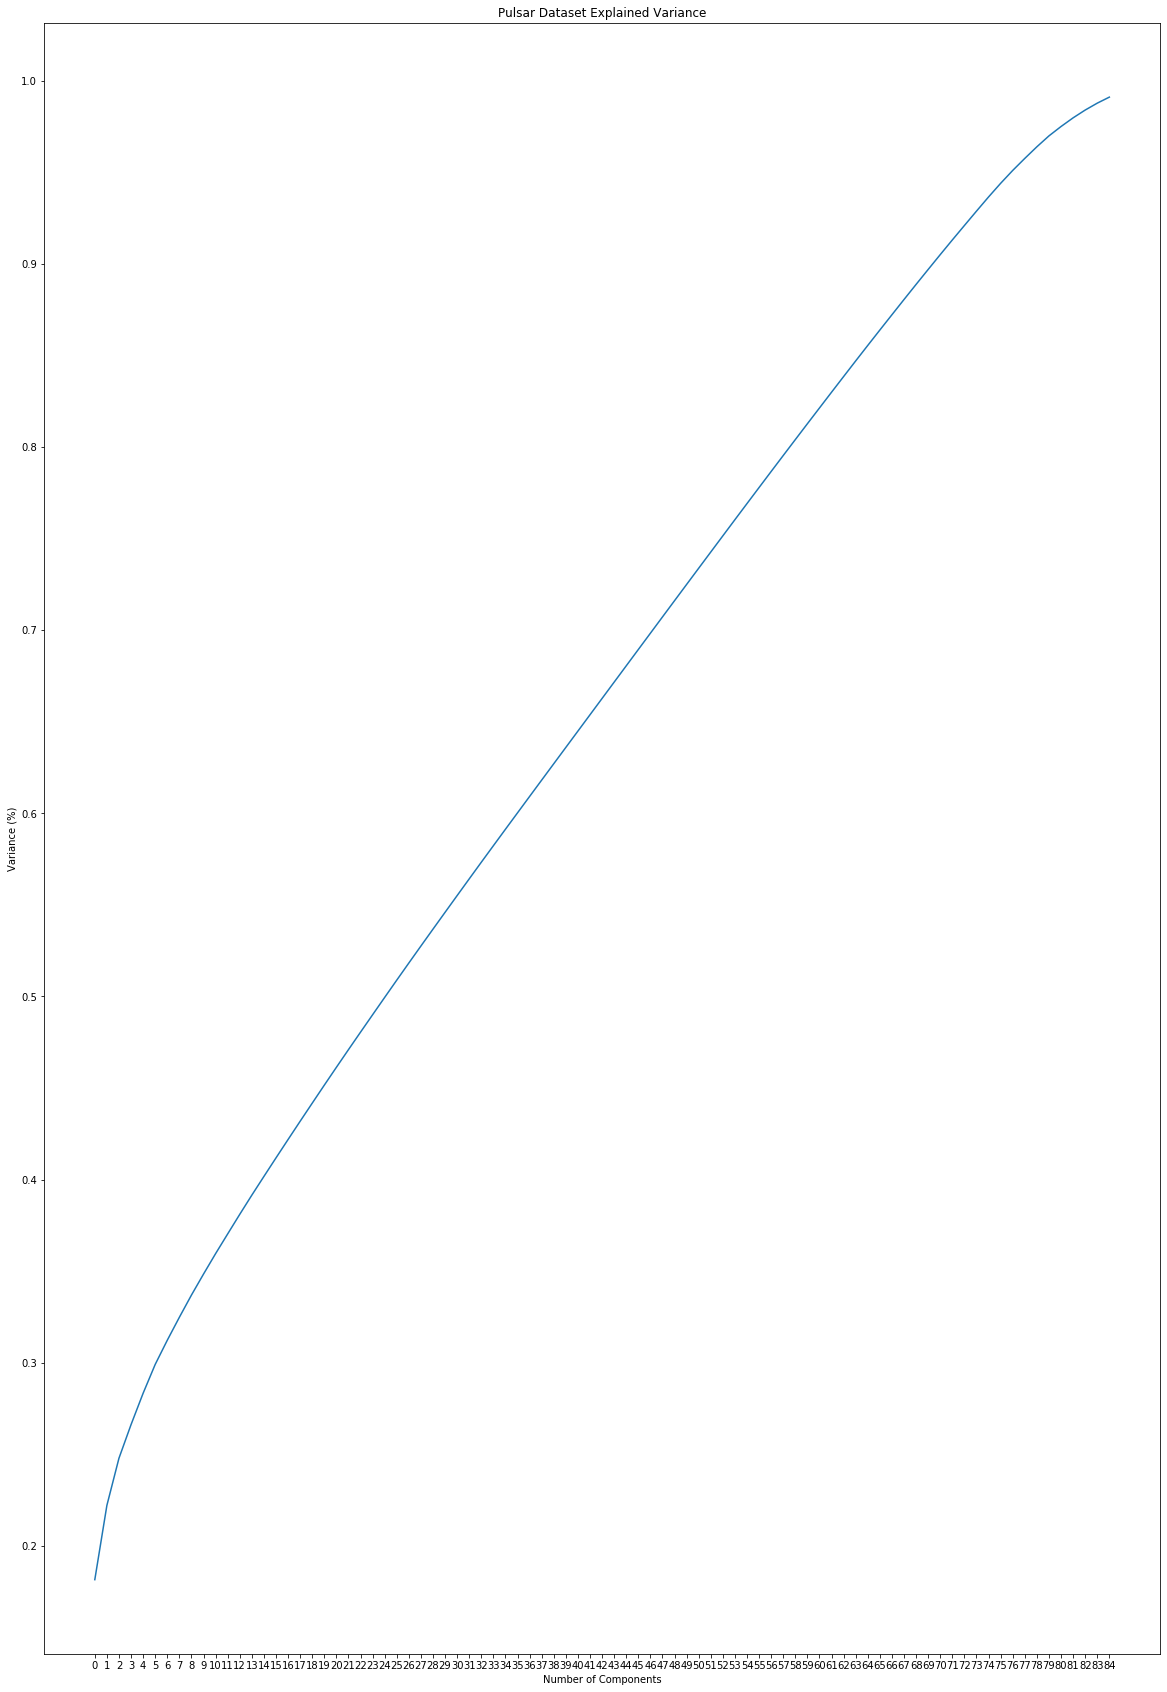

In [47]:
#Fitting the PCA algorithm with our Data
pca = PCA(n_components=85).fit(scaled_x)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(20, 30))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 85, 1)) 
plt.title('Pulsar Dataset Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

We will chose 2 components (we can see the elbow) the second elbow will be on 80

In [48]:
pca = PCA(n_components=80)
train_dataset = pca.fit_transform(scaled_x)

Now I will select the best 10% components that have the best results - we will remain with 8 components

In [49]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10).fit(train_dataset, y)
train_dataset = selector.transform(train_dataset)
train_dataset
train_dataset.shape

(21257, 8)

do the same just now for the test data. so we just need to remove the columns we delete and set the PCA and the feature selection

In [50]:
test_set = pd.read_csv("test_without_target.csv")

In [51]:
test_set.head()

,Unnamed: 0,age,education,feature_01,feature_02,feature_03,feature_05,feature_06,feature_07,feature_08,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,hours.per.week,marital.status,sex
0,0,29.0,Some-college,A,232.287283,1.0,c0,-inf,e,-0.014136,...,-4526.098436,cat_h,3.328587,100.0,2.0,0.0,280618.0,40.0,Married-civ-spouse,Male
1,1,19.0,Some-college,A,231.248505,0.0,c0,-inf,c,0.100809,...,1176.239994,cat_i,2.614309,100.0,3.0,0.0,439779.0,15.0,Never-married,Male
2,2,28.0,Some-college,A,233.728253,1.0,c0,-inf,f,0.063173,...,-1946.400896,cat_k,2.293081,100.0,2.0,0.0,204734.0,40.0,Married-civ-spouse,Female
3,3,35.0,11th,A,194.743706,0.0,c0,-inf,a,-0.135740,...,1522.963164,cat_i,2.266946,70.0,5.0,0.0,107991.0,45.0,Never-married,Male
4,4,20.0,Some-college,A,232.427175,0.0,?,-inf,c,-0.265489,...,504.218250,cat_e,2.777423,100.0,3.0,0.0,54152.0,30.0,Never-married,Female


### Applling all preprossecing on test set

In [52]:
#filling in the missing data
test_set = test_set[(test_set['age'] >= 0)]
test_set = test_set[(test_set['age'] <= 100)]

#test_set['sex'].dropna(inplace=True)
test_set['age'].fillna(test_set['age'].median(), inplace = True)
test_set['hours.per.week'].fillna(test_set['hours.per.week'].median(), inplace = True)
test_set['feature_02'].fillna(test_set['feature_02'].median(), inplace = True)
test_set['feature_13'].fillna(test_set['feature_13'].median(), inplace = True)
test_set['education'].fillna(test_set['education'].value_counts().idxmax(), inplace = True)
test_set['marital.status'].fillna(test_set['marital.status'].value_counts().idxmax(), inplace = True)
test_set['feature_01'].fillna(test_set['feature_01'].value_counts().idxmax(), inplace = True)
test_set['feature_03'].fillna(test_set['feature_03'].value_counts().max(), inplace = True)
test_set['feature_07'].fillna(test_set['feature_07'].value_counts().idxmax(), inplace = True)
test_set['feature_12'].fillna(test_set['feature_12'].value_counts().idxmax(), inplace = True)
test_set['feature_08'].fillna(test_set['feature_08'].median(), inplace = True)
test_set['feature_09'].fillna(test_set['feature_09'].median(), inplace = True) #notice it has weird values before filling the missing
test_set['feature_10'].fillna(test_set['feature_10'].median(), inplace = True) 
test_set['feature_11'].fillna(test_set['feature_11'].median(), inplace = True) 
test_set['feature_16'].fillna(test_set['feature_16'].median(), inplace = True) 

#WE DON'T WANT TO DELETE ANY OBSERVATION SO WE WILL HANDLE THEM DIFFERENTLY
test_set['sex'].fillna(test_set['sex'].value_counts().idxmax(), inplace = True)

In [53]:
#let's fill in features 15 and features 17 by median value of each column
test_set['feature_15'].fillna(test_set['feature_15'].median(), inplace = True)
test_set['feature_17'].fillna(test_set['feature_17'].median(), inplace = True)

In [54]:
#we have extra col in the beginng
test_set.drop('Unnamed: 0', axis=1, inplace=True)

#deleting features due explanation on the train set above
test_set.drop(['feature_11', 'feature_14'], axis=1, inplace=True)
test_set.drop('feature_06', axis=1, inplace=True)

Notice! Outlier Removal Using Pandas- I am not going to delete the test data because every observation need to get a prediction.

In [55]:
#checkin if in the test set we have NAN'S that we did not deal with in our train set
print(test_set.isnull().sum())

age               0
education         0
feature_01        0
feature_02        0
feature_03        0
feature_05        1
feature_07        0
feature_08        0
feature_09        0
feature_10        0
feature_12        0
feature_13        0
feature_15        0
feature_16        0
feature_17        0
hours.per.week    0
marital.status    0
sex               0
dtype: int64


In [56]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8140
Data columns (total 18 columns):
age               8136 non-null float64
education         8136 non-null object
feature_01        8136 non-null object
feature_02        8136 non-null float64
feature_03        8136 non-null float64
feature_05        8135 non-null object
feature_07        8136 non-null object
feature_08        8136 non-null float64
feature_09        8136 non-null float64
feature_10        8136 non-null float64
feature_12        8136 non-null object
feature_13        8136 non-null float64
feature_15        8136 non-null float64
feature_16        8136 non-null float64
feature_17        8136 non-null float64
hours.per.week    8136 non-null float64
marital.status    8136 non-null object
sex               8136 non-null object
dtypes: float64(11), object(7)
memory usage: 1.2+ MB


In [57]:
#object to dummies
print(test_set.shape)
test_set = pd.get_dummies(data=test_set, columns=object_col_names, drop_first=True)
print(test_set.shape)

(8136, 18)
(8136, 97)


In [58]:
# We would like to use only the cols we had on the train data set, the test data set includes more catgorial features and that's the reason why we had 97 cols and not 94 as we had in the train data set.
test_set = test_set[list(x.columns)]

In [59]:
print(test_set.shape)

(8136, 94)


In [60]:
#scale
test_scaled = scaler.transform(test_set)

In [61]:
sum(np.isnan(test_scaled))
test_scaled.shape

(8136, 94)

In [62]:
test_scaled_df = pd.DataFrame(data=test_scaled, columns=list(x.columns))
type(test_scaled_df)

pandas.core.frame.DataFrame

In [63]:
print(sum(test_scaled_df.isnull().sum()))
#test_scaled_df.columns

0


In [64]:
#creating a new feature to the test scaled data as has been done in the train data set
test_scaled_df['feature_08_feature_09'] = test_scaled_df['feature_08']*test_scaled_df['feature_09']

In [65]:
print(test_scaled_df.isnull().sum())

age                                     0
feature_02                              0
feature_03                              0
feature_08                              0
feature_09                              0
feature_10                              0
feature_13                              0
feature_15                              0
feature_16                              0
feature_17                              0
hours.per.week                          0
education_11th                          0
education_12th                          0
education_7th-8th                       0
education_9th                           0
education_Assoc-acdm                    0
education_Assoc-voc                     0
education_Bachelors                     0
education_Doctorate                     0
education_HS-grad                       0
education_Masters                       0
education_Prof-school                   0
education_Some-college                  0
feature_01_B                      

In [66]:
#PCA - on the test data set
test_scaled_df = pca.transform(test_scaled_df)

In [67]:
#feature selection
test_scaled_df = selector.transform(test_scaled_df)

In [68]:
#let's check for nan or other problems
print(np.isnan(test_scaled_df).sum())
#print(test_scaled_df)

0


In [69]:
#let's change y table into float
y = np.array(y, dtype=np.float)

## Models Running And Models Evaluations
I will define the KfoldPlot function in order to evaluate my selected modles

In [70]:
from sklearn.model_selection import train_test_split
# 80% go into the training test, 20% in the validation test
X_train, X_validation, y_train, y_validation = train_test_split(train_dataset, y, test_size=0.3, random_state=42)

In [71]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

def KfoldPlot(X, y, clf, k):
    
    #str(clf) returns the name of the classifier, we set this as the title.
    clfname = str(clf)[:str(clf).find("(")]
    
    #We prepare a figure, which will be filled in with some graphs inside.
    plt.figure()
    
    #We initialize the KFOLD, which will be iterated later.
    kf = KFold(n_splits=k, shuffle=False)

    #Since we need to interpolate data, we set an mean tpr and fpr for later porpuses.
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    i=1
    #We iterate over the folds.
    for train_index, test_index in kf.split(X):
        
        
        #Just printing the current fold
        print("folding No. ", i)
        
        #Splitting into train and validation, based on the current fold.
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        #We fit with X_train and y_train.
        clf.fit(X_train, y_train)
        
        #The prediction we want to test against are the probability of 1 of the X_test
        prob_prediction = clf.predict_proba(X_test)[:, 1]
        
        #Right now we can set our ROC curve on the specific fold.
        fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
        
        #We interpolate the mean_tpr so all of the classifiers will be working under the same thersholds.
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        
        #We plot the current fold with the color #D3D3D3
        plt.plot(fpr, tpr, color='#D3D3D3')
        i+=1
    
    plt.plot([0], [0], color='#D3D3D3', linestyle='-', label='K-folds')    
    
    
    #Right now the mean_tpr is a sum (we added each iteration, so we finally divide by the number of folds)
    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    #After all of the iterations, we plot the random-guess line
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    #And we plot the mean roc, the red line should be in the middle of all gray lines.
    plt.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)

    #Setting some boundaries and adding a legend... nothing special.
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + clfname)
    plt.legend(loc="lower right")
    plt.show()

Let's run some models
### Naive Bayes Classifier
In this model we need to split the data into train and validation sets instad of using the grid search.

In [70]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
naive_bayes_clf = GaussianNB()

# Train the model using the training sets
naive_bayes_clf.fit(X_train,y_train)

#Predict Output
naive_bayes_y_predicted= naive_bayes_clf.predict(X_validation)

In [71]:
from sklearn.metrics import roc_auc_score
naive_bayes_auc = roc_auc_score(y_validation, naive_bayes_y_predicted)
roc_auc_score(y_validation, naive_bayes_y_predicted)

0.5726718955113568

In [72]:
#naive_bayes_auc = 0.5726718955113568

### Knn Model 
 K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.
 

In [73]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [73]:


#find knn parameters with grid search
parameters_options = {'n_neighbors':[1,10,25,50,100,200, 300],
                     'weights': ["uniform", "distance"],
                     'metric': ["euclidean", "uniform", "mahattan"],
                     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gs_knn = GridSearchCV(neighbors.KNeighborsClassifier(), parameters_options, cv=4, scoring ='roc_auc')
gs_knn.fit(X_train, y_train)

print ('Knn chosen parameters (recieved best AUC): {}'.format(gs_knn.best_params_))
print ("Knn AUC score with the chosen parameters: ", gs_knn.best_score_)

#saving the best AUC score of the best parameters
knn_auc = gs_knn.best_score_
#using the best parameters
knn_clf = KNeighborsClassifier(**gs_knn.best_params_) 


C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahat

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahat

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metri

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uni

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['kd_tree']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'm

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'uniform

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahattan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'mahat

Knn chosen parameters (recieved best AUC): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'distance'}
Knn AUC score with the chosen parameters:  0.8870624198321494


folding No.  1


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  2


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  3


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  4


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  5


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  6


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


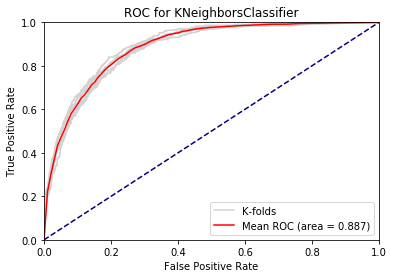

0.8463468171840702

In [74]:
#using the best parameters
KfoldPlot(X_train, y_train, knn_clf, 6)
knn_clf.score(X_validation, y_validation) #model accuracy on validation

In [75]:
#knn_auc = 0.88706
'''Knn chosen parameters (recieved best AUC): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'distance'}
Knn AUC score with the chosen parameters:  0.8870624198321494'''

"Knn chosen parameters (recieved best AUC): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'distance'}\nKnn AUC score with the chosen parameters:  0.8870624198321494"

### Logistic Regression
This model is used to estimate discrete values (Binary values like 0/1, yes/no, true/false) based on given set of independent variables. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.
Hence, it is also known as logit regression. Since, it predicts the probability, it's output values are between 0 and 1.
Logistic Regression chosen parameters (recieved best AUC): {'C': 100, 'max_iter': 50, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression AUC score with the chosen parameters:  0.8849164811360958

In [76]:
from sklearn.linear_model import LogisticRegression

#find logistic regression parameters with grid search
parameters_options = {'penalty':['l1', 'l2'], # As shown above - l1 stands for abs distance, l2 stands for quad_distances
                     'C': [0.001, 0.01, 1, 100, 10000, 100000], # # Inverse regularization parameter, larger C means less regularization.
                     'tol': [0.0001, 0.001],
                      'max_iter': [50, 100, 200]} # Stopping critiria
gs_logistic = GridSearchCV(LogisticRegression(), parameters_options, cv=3, scoring ='roc_auc')
gs_logistic.fit(X_train, y_train)

print ('Logistic Regression chosen parameters (recieved best AUC): {}'.format(gs_logistic.best_params_))
print ("LogisticRegression AUC score with the chosen parameters: ", gs_logistic.best_score_)

#using the best parameters
lr_clf = LogisticRegression(**gs_logistic.best_params_, random_state=42)
#saving the best AUC score of the best parameters
lr_auc = gs_logistic.best_score_

C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\rotem\lib\site-packages\sklearn\model_selection\_validation.py:5

Logistic Regression chosen parameters (recieved best AUC): {'C': 100, 'max_iter': 50, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression AUC score with the chosen parameters:  0.8849164811360958


In [77]:
#lr_auc = 0.88491

folding No.  1
folding No.  2
folding No.  3
folding No.  4


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  5


C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  6


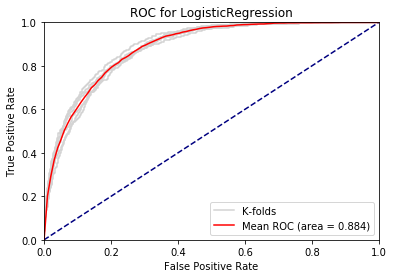

0.8447789275634995

In [78]:
#logistic_clf = LogisticRegression(penalty="l2", C=5, tol=0.0001, max_iter=50) #using the best parameters
KfoldPlot(X_train, y_train, lr_clf, 6)
lr_clf.score(X_validation, y_validation) #model accuracy on validation

### Multi Layer Perceptron (ANN)

Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'batch_size': 50, 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
Neural Network AUC score with the chosen parameters:  0.8912965613579069

In [74]:
#find MLP parameter with grid search
from sklearn.neural_network import MLPClassifier, MLPRegressor
parameters_options = {'activation' : ["logistic", "relu"],
                      'solver': ['sgd', 'adam'],
                      'learning_rate': ['constant', 'adaptive'],
                      'batch_size' : [10, 50],
                      'max_iter': [50, 100, 200]}
gs_ann = GridSearchCV(MLPClassifier(), parameters_options, cv=3, scoring ='roc_auc')
gs_ann.fit(X_train, y_train)

print ('Neural Network chosen parameters (recieved best AUC): {}'.format(gs_ann.best_params_))
print ("Neural Network AUC score with the chosen parameters: ", gs_ann.best_score_)

#saving the best AUC score of the best parameters
Ann_auc = gs_ann.best_score_

#using the best parameters
ann_clf = MLPClassifier(**gs_ann.best_params_)

C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-pack

C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-pa

C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-

C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-

Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'batch_size': 50, 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
Neural Network AUC score with the chosen parameters:  0.8919727989181268


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


folding No.  1


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  2


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  3


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  4


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  5


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  6


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


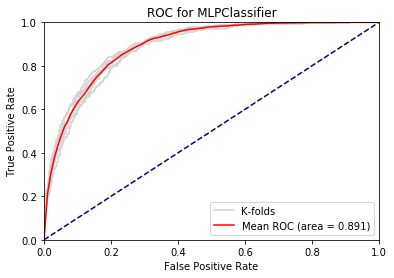

0.8491690185010975

In [75]:
#ann_clf = MLPClassifier(solver ='adam' ,learning_rate ='adaptive' , max_iter=100) #using the best parameters
KfoldPlot(X_train, y_train, ann_clf, 6)

ann_clf.score(X_validation, y_validation) #model accuracy on validation

In [81]:
#Ann_auc = 0.89167

### Adaptive Boosting
AdaBoost is best used to boost the performance of decision trees on binary classification problems.
Weak models are added sequentially, trained using the weighted training data. The process continues until a pre-set number of weak learners have been created (a user parameter) or no further improvement can be made on the training dataset.
Once completed, we are left with a pool of weak learners each with a stage value.

AdaBoost chosen parameters (recieved best AUC): {'n_estimators': 100, 'random_state': 42}
AdaBoost is model produces a mean cross-validated score (auc) of 0.8859636806510327

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#find ada boost parameter with grid search
parameters_options = {'n_estimators':[50, 100, 500, 750],
                     'random_state': [42]}
# random_state is only to ensure repeatable results. You can remove it when running your own code.

gs_ada = GridSearchCV(AdaBoostClassifier(), parameters_options, cv=2, scoring ='roc_auc')
gs_ada.fit(X_train, y_train)


print('AdaBoost chosen parameters (recieved best AUC): {}'.format(gs_ada.best_params_))
print('AdaBoost is model produces a mean cross-validated score (auc) of', gs_ada.best_score_)

#saving the best AUC score of the best parameters
adaBoost_auc = gs_ada.best_score_
#using the best parameters
adaBoost_clf = AdaBoostClassifier(**gs_ada.best_params_)

AdaBoost chosen parameters (recieved best AUC): {'n_estimators': 100, 'random_state': 42}
AdaBoost is model produces a mean cross-validated score (auc) of 0.8859636806510327


folding No.  1


<ipython-input-69-fdd23ca8e440>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


folding No.  2


<ipython-input-69-fdd23ca8e440>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


folding No.  3


<ipython-input-69-fdd23ca8e440>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


folding No.  4


<ipython-input-69-fdd23ca8e440>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


folding No.  5


<ipython-input-69-fdd23ca8e440>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


folding No.  6


<ipython-input-69-fdd23ca8e440>:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


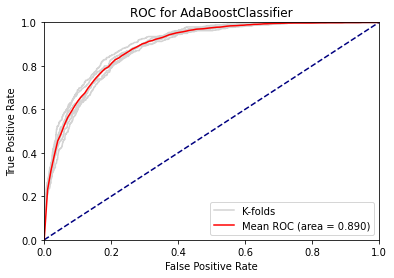

In [83]:
#Now we will use the best parameters from the grid search and will used them in the from sklearn.neural_network import MLPClassifier, MLPRegressor
KfoldPlot(X_train, y_train, adaBoost_clf, 6)

In [82]:
adaBoost_auc = 0.88596

## Support Vectors Machine Model (SVM)

SVM chosen parameters (recieved best AUC): {'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}
SVM is model produces a mean cross-validated score (auc) of 0.8871159815352934

In [ ]:
#keep stucking in the running
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification

tuned_parameters = {'kernel':['linear', 'rbf'],
                    'C':[1, 10, 100, 1000],
                    'gamma':[1e-3, 1e-4],
                    'probability':[True]}

gs_svm = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='roc_auc')
gs_svm.fit(X_train, y_train)
print('SVM chosen parameters (recieved best AUC): {}'.format(gs_svm.best_params_))
print('SVM is model produces a mean cross-validated score (auc) of', gs_svm.best_score_)

#saving the best AUC score of the best parameters
SVC_auc = gs_svm.best_score_

#using the best parameters
SVM_clf = AdaBoostClassifier(**gs_svm.best_params_)

In [83]:
svc_auc = 0.88711

In [ ]:
#Now we will use the best parameters from the grid search and will used them in the from sklearn.neural_network import MLPClassifier, MLPRegressor
# # from sklearn.svm import SVC
# SVM_clf = SVC(kernel='linear',
#               probability= True)

KfoldPlot(X_train, y_train, SVM_clf, 6)

## Model Evaluations
## Scores

In [84]:
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'K-Nearest Neighbours', 'Logistic Regression', 'Ann', 'Ada Boost','SVM'],
    'Score': [naive_bayes_auc, knn_auc, lr_auc, Ann_auc, adaBoost_auc, svc_auc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Ann,0.891610
5,SVM,0.887110
1,K-Nearest Neighbours,0.887062
4,Ada Boost,0.885960
2,Logistic Regression,0.884916
0,Naive Bayes,0.572672


Text(0, 0.5, 'AUC Score (%)')

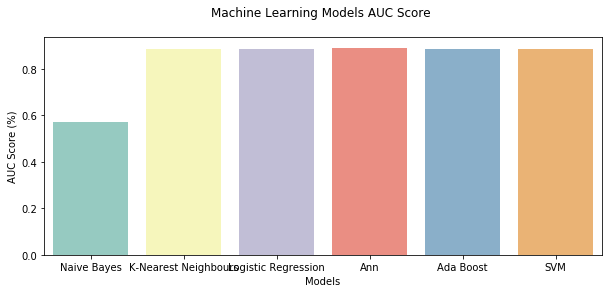

In [85]:
plt.subplots(figsize =(10, 4))

sns.barplot(x='Model', y ='Score' , data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Models AUC Score \n')
plt.xlabel('Models')
plt.ylabel('AUC Score (%)')

## Prediction
After I run all the different models and evaluate their perfurmances I decided to choose the ANN model. Now let's do a prediction on the test set that was given to us and make a probabilitiy prediction.

In [76]:
y_pred = ann_clf.predict(X_validation)

In [77]:
#using sklearn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_validation,y_pred)
tn, fp, fn, tp = cm.ravel()

#calculating the values-
accuracy = (tp+tn)/(tp+fp+fn+tn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
sepcificity = tn/(tn + fp)

print('Accuracy Score : %.2f '%accuracy)
print('Precision Score : %.2f' %precision)
print('Recall Score : %.2f' %recall)
print('Sepcificity Score : %.2f' %sepcificity)

Accuracy Score : 0.85 
Precision Score : 0.69
Recall Score : 0.52
Sepcificity Score : 0.94


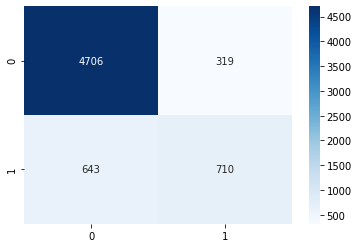

In [78]:
# Plot a confusion Matrix
'''import itertools

title='Confusion matrix'
classes=[0, 1]
plt.title(title)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.yticks(tick_marks, classes)
plt.xticks(tick_marks, classes, rotation=45)


for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')'''

# Plot a confusion Matrix
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues', xticklabels = [0,1], yticklabels = [0,1])
plt.show()

##### Confusion Matrix:
-The top left cell (TP) has 149 observations that were predicted positive and it’s true, they were predicted to have income higher then 50K and it actually is.

-The top right cell (FP) has 195 observations that were predicted positive and it’s false, they were predicted to have income higher then 50K but in reality thier salary is lower then 50K. (Type 1 Error)

-The bottum left cell (FN) has 736 observations that were predicted negative and it’s false, they were predicted to have income lower then 50K but in reality their salary is higher then 50K. (Type 2 Error)

-The bottum right cell (TN) has 3030 observations that were predicted negative and it’s true, they were predicted to have income lower then 50K and in reality their salary is indeed lower then 50K.

##### As we learn in class, if the score of the AUC is 0.5 it's means that that we are in bad situation, the model has no discrimination capacity to distinguish between positive class and negative class- It is a bad model to use so I am not cosidering it. Moreover I saw in the preproscessing that some features does not distribute normally and in this model we have the naive essumption.. #

In [79]:
ann_clf.score(X_validation, y_validation) #model accuracy on validation

0.8491690185010975

folding No.  1


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  2


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  3


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  4


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


folding No.  5


C:\Users\rotem\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rotem\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


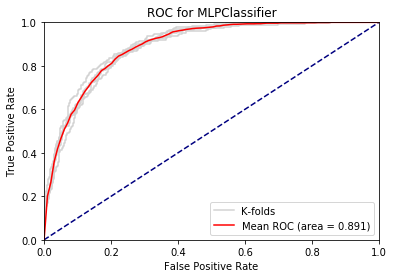

In [80]:
KfoldPlot(X_validation, y_validation,ann_clf , 5) #fit the model on the validation

In [81]:
#Let's save the probability of a personthet will earn over 50,000$. 
predict_test_result = ann_clf.predict_proba(test_scaled_df)

In [82]:
results = pd.DataFrame(data=predict_test_result[:,1], columns=['pred_proba']).to_csv('Submission_group_number.csv')

In [84]:
#time.time() - start #the time the notebook ran for